In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

In [6]:
def get_rectangle_points(mean, length=2, width=1):
    return np.array([
        [mean[0] - length/2, mean[1] - width/2],
        [mean[0] + length/2, mean[1] - width/2],
        [mean[0] + length/2, mean[1] + width/2],
        [mean[0] - length/2, mean[1] + width/2]
    ])
    
# Create two rectangles using mean
rect1 = get_rectangle_points([-5, 2])
rect2 = get_rectangle_points([3, -4])

# Close them for plotting by adding the first point to the end
rect1_closed = np.concatenate([rect1, [rect1[0]]])
rect2_closed = np.concatenate([rect2, [rect2[0]]])

# Create a car using mean
car = np.array([0,-5])

# Create a KDTree and insert points from the two rectangles
points = np.concatenate([rect1, rect2])
tree = KDTree(points)

In [7]:
def get_nearest_points(tree, point, radius):
    # Find the indeces of the tree points that are within the radius of the point
    near_point_indeces = tree.query_ball_point(point, radius)
    
    # Return the points at those indeces
    return tree.data[near_point_indeces]

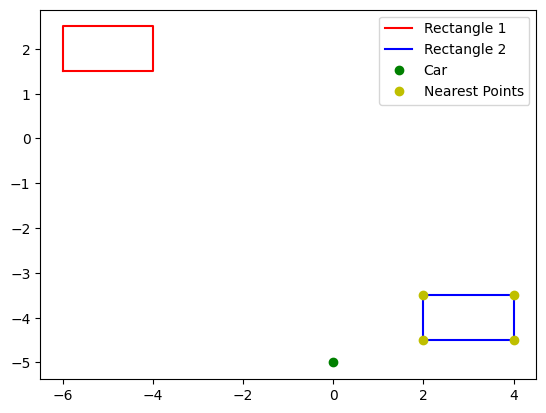

In [9]:
# Query the KDTree to find the nearest point to the car
nearest_points = get_nearest_points(tree, car, 5)
# print(np.array(nearest_points))
# Plot the points
plt.plot(rect1_closed[:,0], rect1_closed[:,1], 'r', label='Rectangle 1')
plt.plot(rect2_closed[:,0], rect2_closed[:,1], 'b', label='Rectangle 2')
plt.plot(car[0], car[1], 'go', label='Car')
plt.plot(nearest_points[:,0], nearest_points[:,1], 'yo', label='Nearest Points')
plt.legend()

In [51]:
# near_point_indeces = tree.query_ball_point(car, 5)
# points = tree.data[near_point_indeces]
# print(points)

# # tree.data
tree_query = tree.query(car, k=10, distance_upper_bound=9)

# Construct an array of rows (x,y, distance) for each point
non_inf_len = np.shape(tree_query[0][tree_query[0] != np.inf])[0] # Length of non-inf points
xy_points = tree.data[tree_query[1][:non_inf_len]]



(array([2.06155281, 2.5       , 4.03112887, 4.27200187, 7.63216876,
       8.5       , 8.84590301,        inf,        inf,        inf]), array([4, 7, 5, 6, 1, 2, 0, 8, 8, 8], dtype=int64))
[[ 2.  -4.5]
 [ 2.  -3.5]
 [ 4.  -4.5]
 [ 4.  -3.5]
 [-4.   1.5]
 [-4.   2.5]
 [-6.   1.5]]
